# Grades of Students dataset

# Problem Statement:
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

# Columns Description -- total 43 columns
Seat No : The enrolled number of candidate that took the exams
CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

# Predict CGPA of a student based on different grades in four years.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('Grades'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('Grades.csv')

In [4]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


# Exploratory Data Analysis

In [5]:
#Size of dataset
df.shape

(571, 43)

In [6]:
#lets have look on the features
df.columns.to_list()

['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

In [7]:
#Lets rename columns for convenience and similarity
df.rename(columns={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

In [8]:
df.head(2)

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008


In [9]:
#Checking for missing values
df.isnull().mean()*100

Seat No.     0.000000
PH-121       0.000000
HS-101       0.000000
CY-105       0.175131
HS-105       0.175131
MT-111       0.350263
CS-105       0.000000
CS-106       0.350263
EL-102       0.350263
EE-119       0.350263
ME-107       0.350263
CS-107       0.350263
HS-205       0.875657
MT-222       0.875657
EE-222       1.225919
MT-224       1.225919
CS-210       1.225919
CS-211       0.875657
CS-203       0.875657
CS-214       1.050788
EE-217       1.050788
CS-212       1.050788
CS-215       1.050788
MT-331       1.576182
EF-303       1.751313
HS-304       1.751313
CS-301       1.751313
CS-302       1.751313
TC-383       1.751313
MT-442       1.751313
EL-332       1.576182
CS-318       1.576182
CS-306       1.576182
CS-312       1.751313
CS-317       2.101576
CS-403       2.101576
CS-421       2.101576
CS-406      14.886165
CS-414       2.276708
CS-419       2.276708
CS-423       2.451839
CS-412      13.835377
CGPA         0.000000
dtype: float64

In [10]:
#Dropping seat.no. column as it has no role in dataset and model 
df.drop(columns=['Seat No.'],inplace=True)

In [11]:
df.head(2)

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008


In [12]:
# Filling missing values with most common value appearing in the dataset
df_i = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [13]:
#As we can see, there are no missing values.
df_i.isnull().sum()

PH-121    0
HS-101    0
CY-105    0
HS-105    0
MT-111    0
CS-105    0
CS-106    0
EL-102    0
EE-119    0
ME-107    0
CS-107    0
HS-205    0
MT-222    0
EE-222    0
MT-224    0
CS-210    0
CS-211    0
CS-203    0
CS-214    0
EE-217    0
CS-212    0
CS-215    0
MT-331    0
EF-303    0
HS-304    0
CS-301    0
CS-302    0
TC-383    0
MT-442    0
EL-332    0
CS-318    0
CS-306    0
CS-312    0
CS-317    0
CS-403    0
CS-421    0
CS-406    0
CS-414    0
CS-419    0
CS-423    0
CS-412    0
CGPA      0
dtype: int64

In [14]:
df_i.reset_index(drop=True,inplace=True)

In [15]:
df_i.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [16]:
# For convenience and modeling , converting categorical values into numerical order
for column in df_i.columns:
    
    df_i[column]=df_i[column].replace('A+',4.0)
    df_i[column]=df_i[column].replace('A',4.0)
    df_i[column]=df_i[column].replace('A-',3.7)
    df_i[column]=df_i[column].replace('B+',3.4)
    df_i[column]=df_i[column].replace('B',3.0)
    df_i[column]=df_i[column].replace('B-',2.7) #checking for coorelation between features
    df_i[column]=df_i[column].replace('C+',2.4)
    df_i[column]=df_i[column].replace('C',2.0)
    df_i[column]=df_i[column].replace('C-',1.7)
    df_i[column]=df_i[column].replace('D+',1.4)
    df_i[column]=df_i[column].replace('D',1.0)
    df_i[column]=df_i[column].replace('F',0.0) #checking for coorelation between features

In [17]:
df_i.head(2)

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008


In [18]:
df_i.corr() #checking for coorelation between features

,HS-101,CS-105,MT-331,CS-301,CS-302,TC-383,MT-442,CS-317,CS-403,CS-419,CS-423,CGPA
HS-101,1.000000,0.432621,0.151900,0.310643,0.373809,0.344223,0.254436,0.409697,0.243646,0.283499,0.240377,0.562432
CS-105,0.432621,1.000000,0.230586,0.244551,0.450468,0.208635,0.446805,0.397065,0.268677,0.317141,0.044027,0.627746
MT-331,0.151900,0.230586,1.000000,0.529686,0.403378,0.433798,0.320140,0.480862,0.463075,0.466236,0.331304,0.514984
CS-301,0.310643,0.244551,0.529686,1.000000,0.594196,0.647684,0.442251,0.663958,0.612552,0.632891,0.600443,0.698290
CS-302,0.373809,0.450468,0.403378,0.594196,1.000000,0.508711,0.533834,0.650783,0.438038,0.539169,0.459356,0.704748
TC-383,0.344223,0.208635,0.433798,0.647684,0.508711,1.000000,0.301546,0.579772,0.538570,0.503410,0.549923,0.598895
MT-442,0.254436,0.446805,0.320140,0.442251,0.533834,0.301546,1.000000,0.518189,0.335705,0.432858,0.289501,0.582635
CS-317,0.409697,0.397065,0.480862,0.663958,0.650783,0.579772,0.518189,1.000000,0.529344,0.630607,0.557037,0.785866
CS-403,0.243646,0.268677,0.463075,0.612552,0.438038,0.538570,0.335705,0.529344,1.000000,0.628865,0.348681,0.560895
CS-419,0.283499,0.317141,0.466236,0.632891,0.539169,0.503410,0.432858,0.630607,0.628865,1.000000,0.479060,0.653644


<AxesSubplot:>

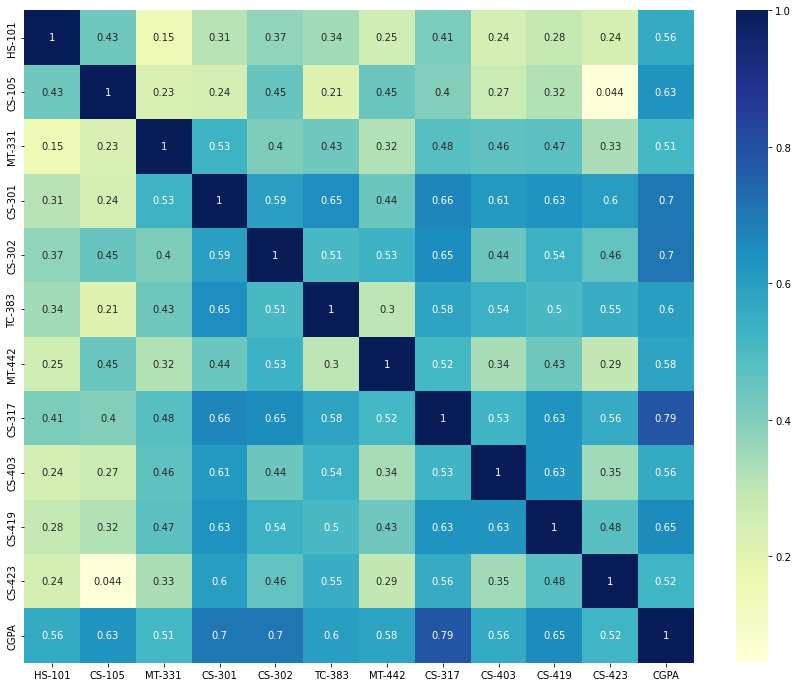

In [19]:
plt.figure(figsize=[15,12])
sns.heatmap(df_i.corr(),annot=True, cmap='YlGnBu')

In [20]:
df_i['HS-101'].value_counts()

3.7    82
2.7    78
2.0    68
3.0    63
3.4    59
1.7    50
2.4    47
1.0    45
4.0    42
1.4    36
0.0     1
Name: HS-101, dtype: int64

In [21]:
df_i.dtypes

PH-121     object
HS-101    float64
CY-105     object
HS-105     object
MT-111     object
CS-105    float64
CS-106     object
EL-102     object
EE-119     object
ME-107     object
CS-107     object
HS-205     object
MT-222     object
EE-222     object
MT-224     object
CS-210     object
CS-211     object
CS-203     object
CS-214     object
EE-217     object
CS-212     object
CS-215     object
MT-331    float64
EF-303     object
HS-304     object
CS-301    float64
CS-302    float64
TC-383    float64
MT-442    float64
EL-332     object
CS-318     object
CS-306     object
CS-312     object
CS-317    float64
CS-403    float64
CS-421     object
CS-406     object
CS-414     object
CS-419    float64
CS-423    float64
CS-412     object
CGPA      float64
dtype: object

<Figure size 3600x2520 with 0 Axes>

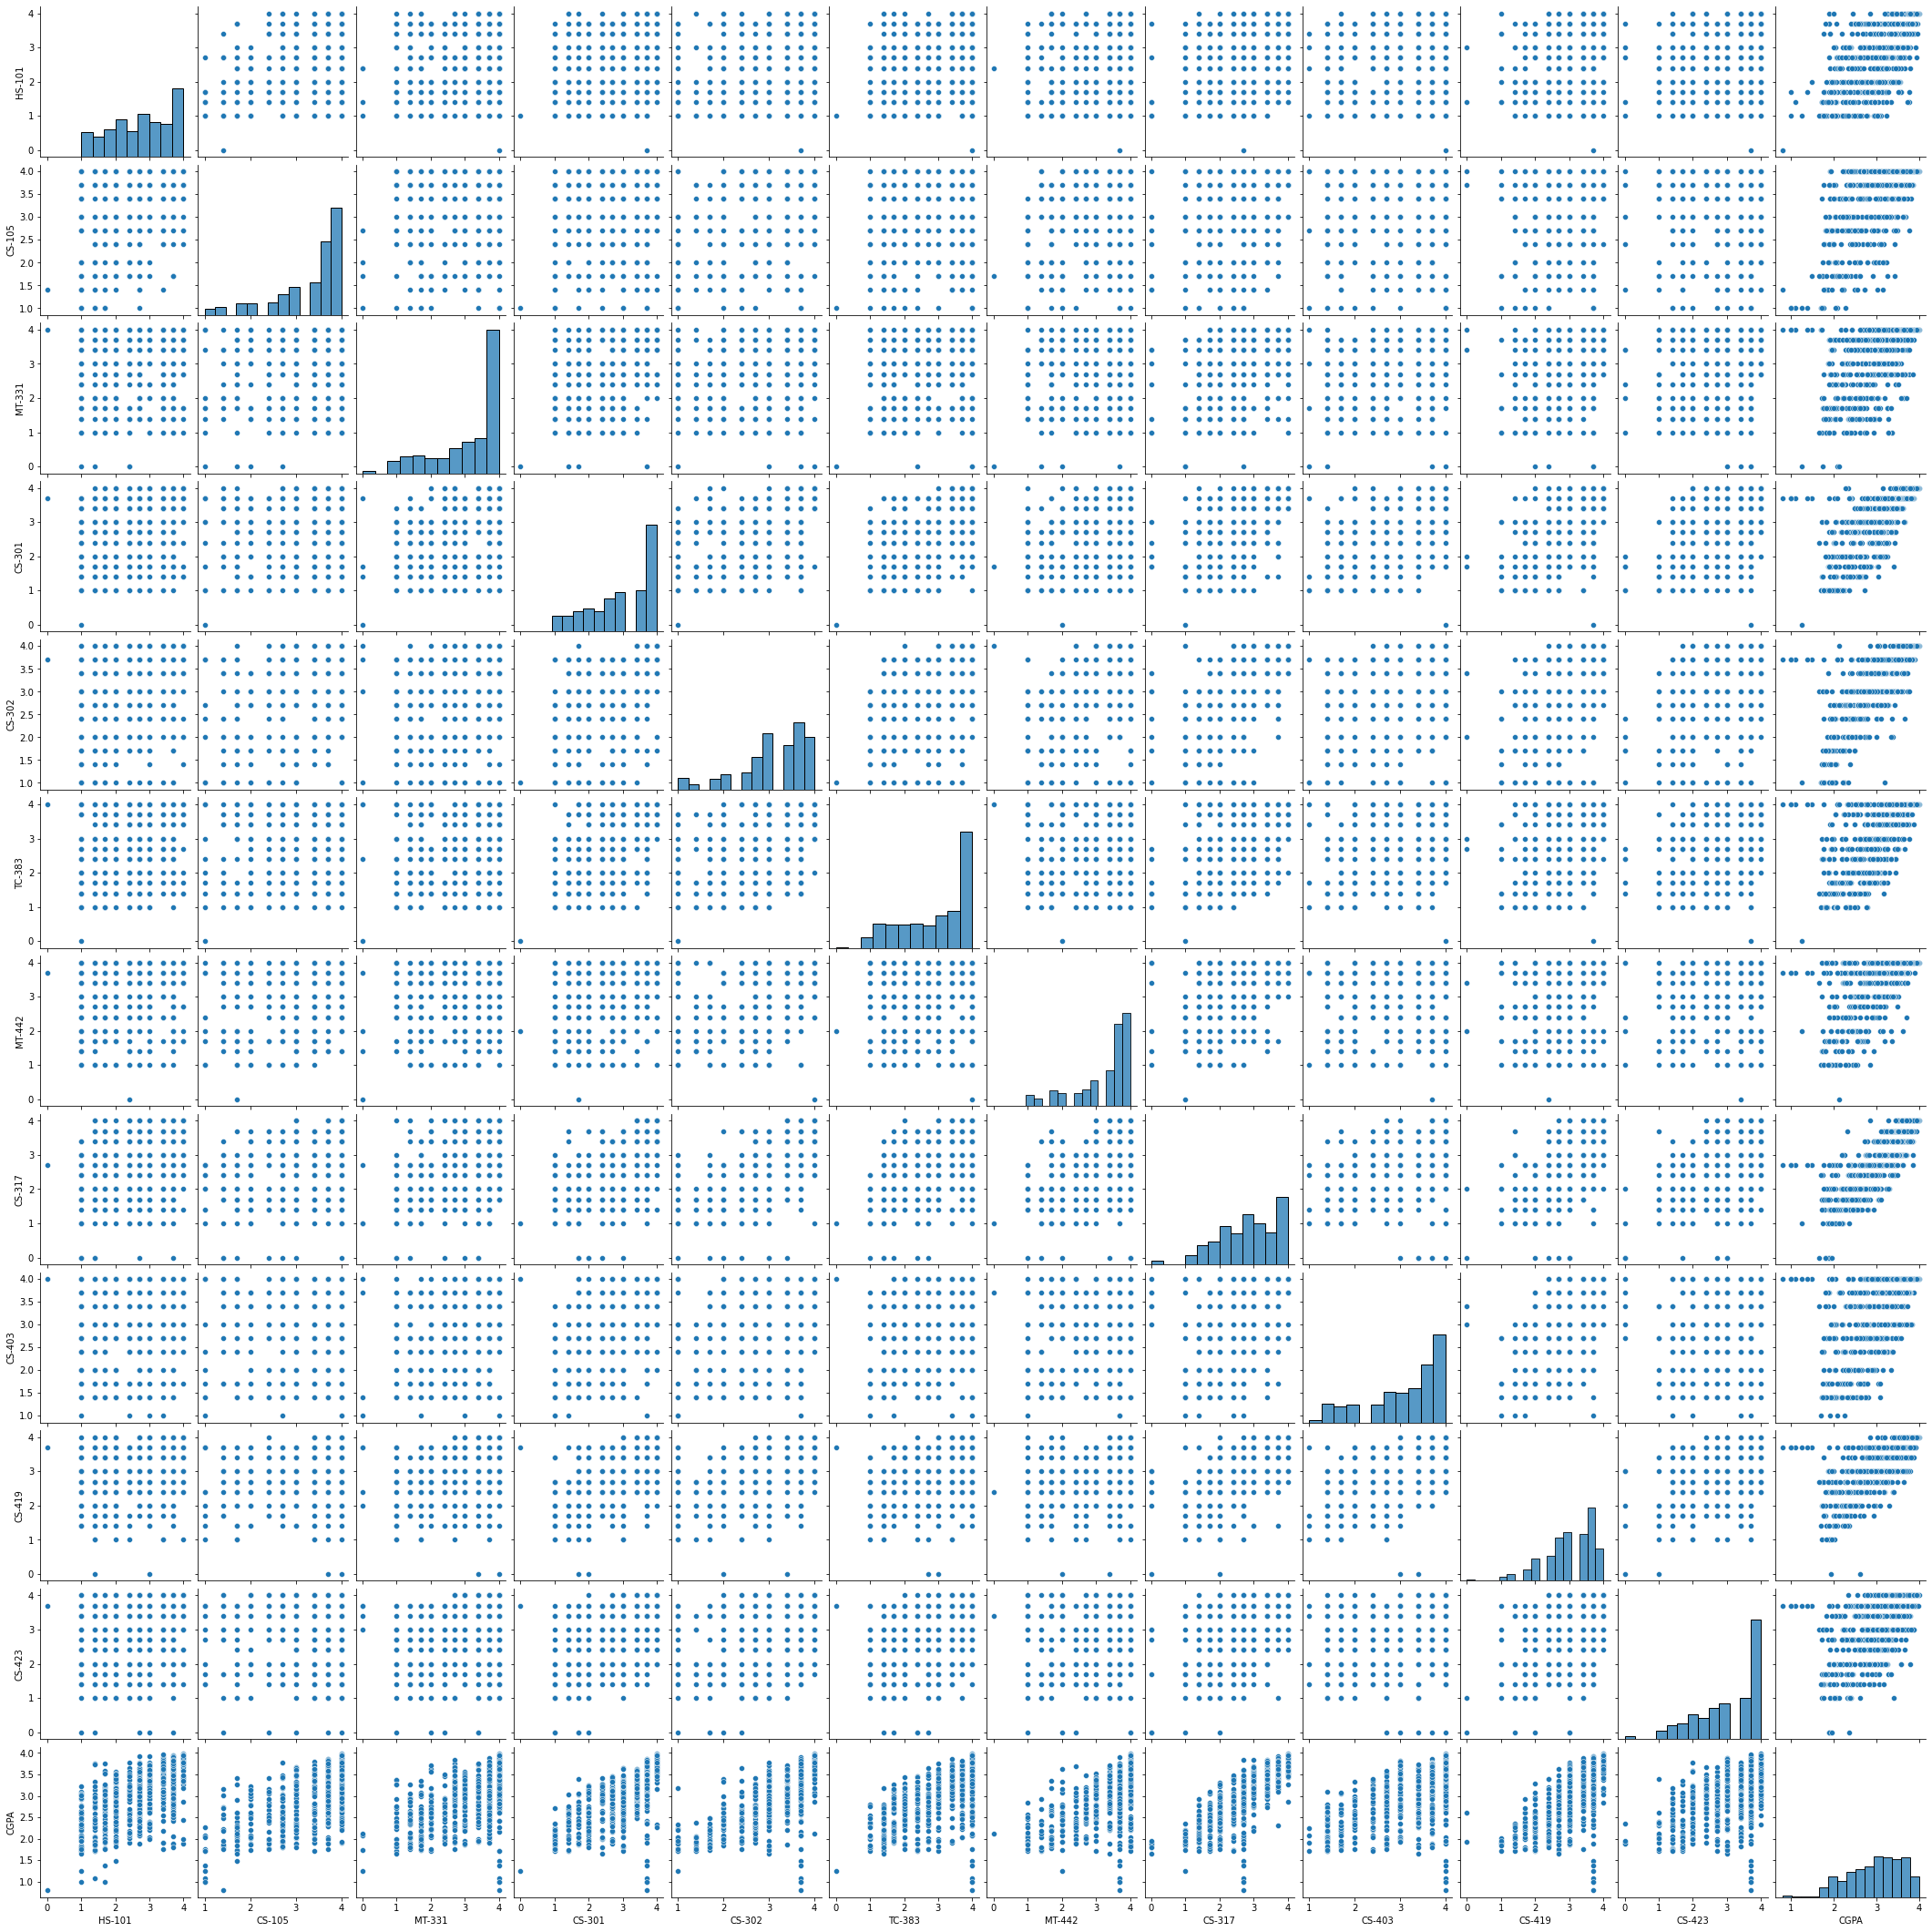

In [22]:
# Different distribution patterns of features
plt.figure(figsize=[50,35])
sns.pairplot(df_i)

In [23]:
df_i['CGPA'].value_counts()

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64

In [24]:
df_i['CGPA'].max()

3.985

In [25]:
df_i['CGPA'].min()

0.8

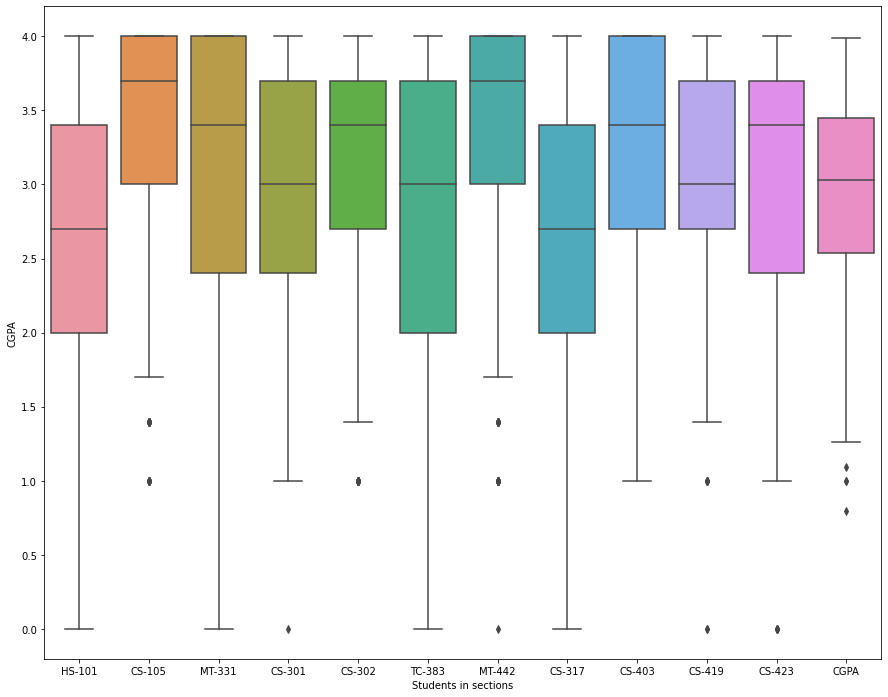

In [26]:
# Clearly can be seen that dataset has outliers
plt.figure(figsize=[15,12])
sns.boxplot(data=df_i)
plt.xlabel('Students in sections')
plt.ylabel('CGPA')
plt.show()

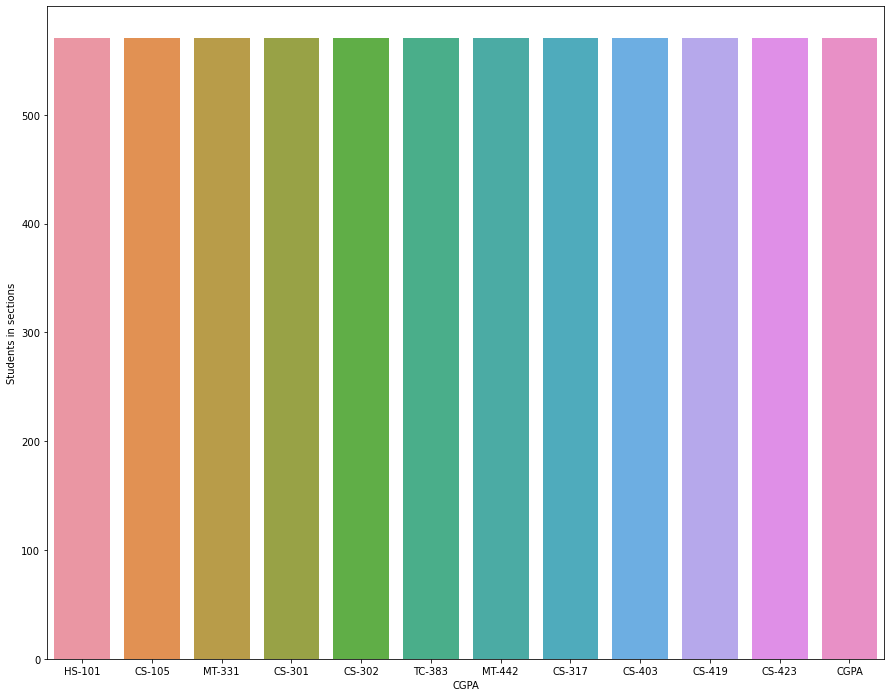

In [27]:
plt.figure(figsize=[15,12])
sns.countplot(data=df_i)
plt.xlabel('CGPA')
plt.ylabel('Students in sections')
plt.show()


In [28]:
df_i2=df_i['CGPA'] >3

In [29]:
df_i2

0      False
1      False
2       True
3      False
4       True
       ...  
566     True
567     True
568     True
569    False
570    False
Name: CGPA, Length: 571, dtype: bool

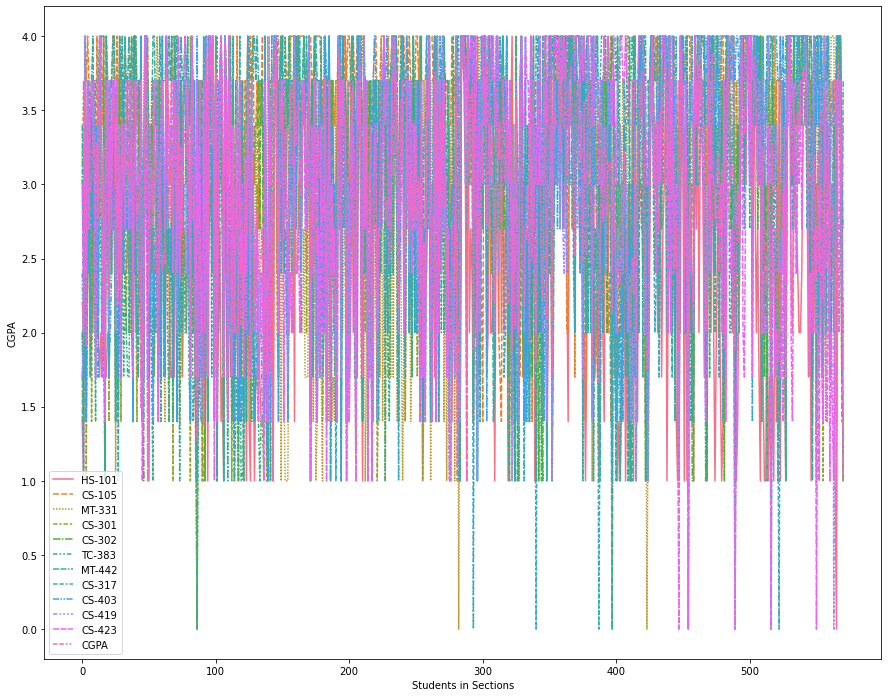

In [30]:
plt.figure(figsize=[15,12])
sns.lineplot(data=df_i)
plt.xlabel('Students in Sections')
plt.ylabel('CGPA')
plt.show()

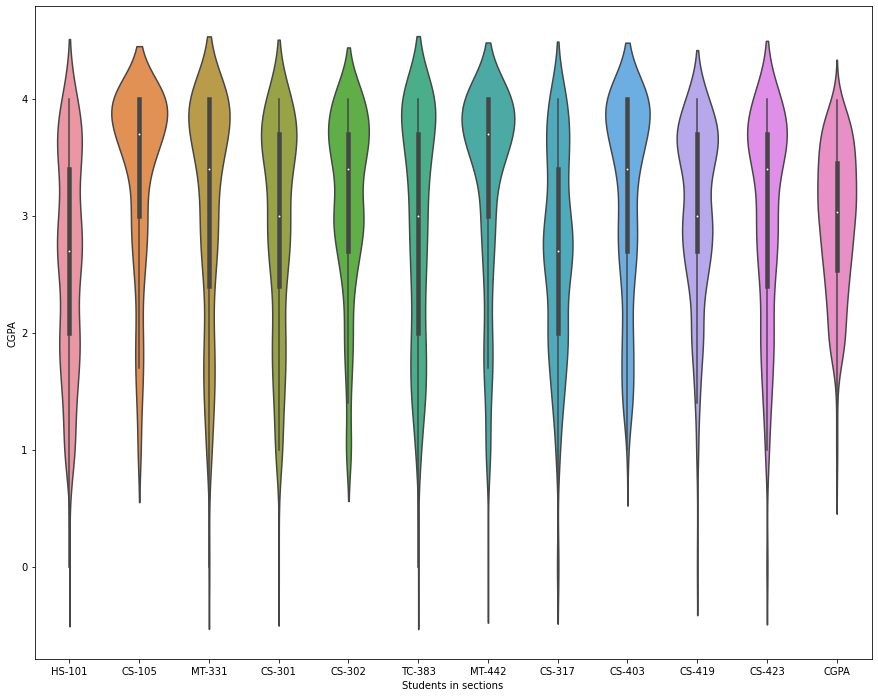

In [31]:
plt.figure(figsize=[15,12])
sns.violinplot(data=df_i)
plt.xlabel('Students in sections')
plt.ylabel('CGPA')
plt.show()

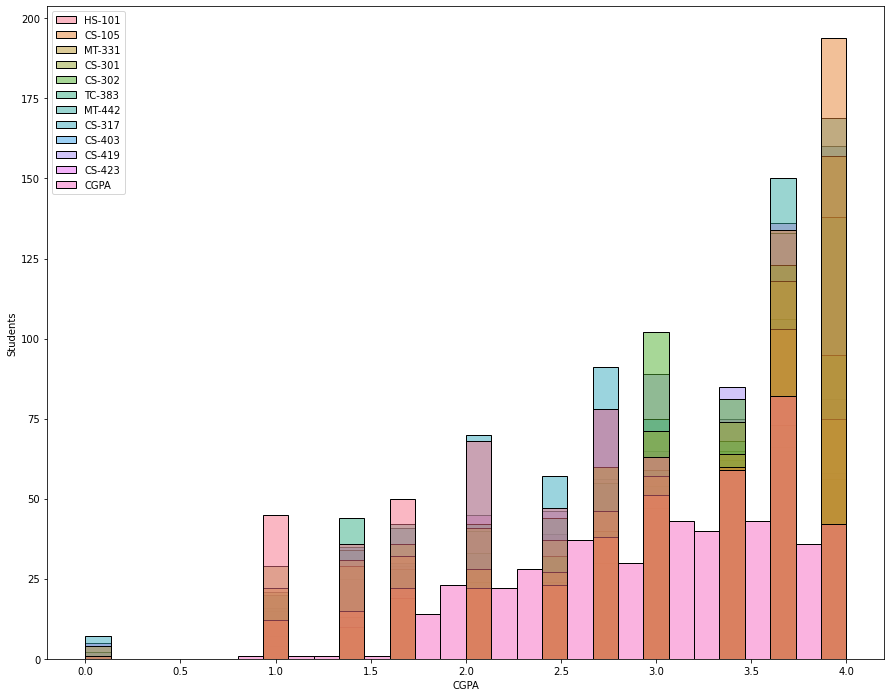

In [32]:
plt.figure(figsize=[15,12])
sns.histplot(data=df_i) 
plt.xlabel('CGPA')
plt.ylabel('Students')
plt.show()

In [33]:
df_i.describe()

,HS-101,CS-105,MT-331,CS-301,CS-302,TC-383,MT-442,CS-317,CS-403,CS-419,CS-423,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,2.628371,3.329247,3.086690,2.915587,3.114886,2.943783,3.266900,2.707881,3.152890,3.047811,2.997023,2.954888
std,0.908402,0.799826,0.948423,0.898724,0.780602,0.952288,0.855492,0.869497,0.852533,0.739991,0.880316,0.620552
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,2.400000,2.400000,2.700000,2.000000,3.000000,2.000000,2.700000,2.700000,2.400000,2.538000
50%,2.700000,3.700000,3.400000,3.000000,3.400000,3.000000,3.700000,2.700000,3.400000,3.000000,3.400000,3.029000
75%,3.400000,4.000000,4.000000,3.700000,3.700000,3.700000,4.000000,3.400000,4.000000,3.700000,3.700000,3.451000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  571 non-null    object 
 1   HS-101  571 non-null    object 
 2   CY-105  570 non-null    object 
 3   HS-105  570 non-null    object 
 4   MT-111  569 non-null    object 
 5   CS-105  571 non-null    object 
 6   CS-106  569 non-null    object 
 7   EL-102  569 non-null    object 
 8   EE-119  569 non-null    object 
 9   ME-107  569 non-null    object 
 10  CS-107  569 non-null    object 
 11  HS-205  566 non-null    object 
 12  MT-222  566 non-null    object 
 13  EE-222  564 non-null    object 
 14  MT-224  564 non-null    object 
 15  CS-210  564 non-null    object 
 16  CS-211  566 non-null    object 
 17  CS-203  566 non-null    object 
 18  CS-214  565 non-null    object 
 19  EE-217  565 non-null    object 
 20  CS-212  565 non-null    object 
 21  CS-215  565 non-null    object 
 22  MT

<AxesSubplot:xlabel='MT-331', ylabel='Count'>

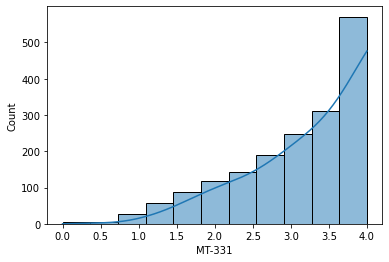

In [35]:
sns.histplot(df_i['MT-331'],cumulative=True, kde=True)

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

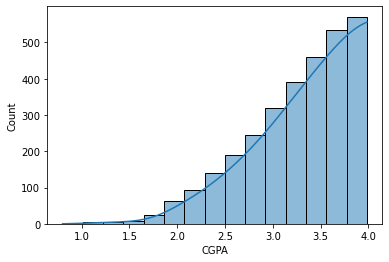

In [36]:
sns.histplot(df_i['CGPA'],cumulative=True, kde=True)

C:\Users\Kiran Digambar Yadav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CGPA', ylabel='Density'>

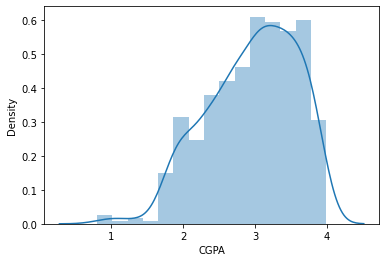

In [37]:
sns.distplot(df_i['CGPA'])

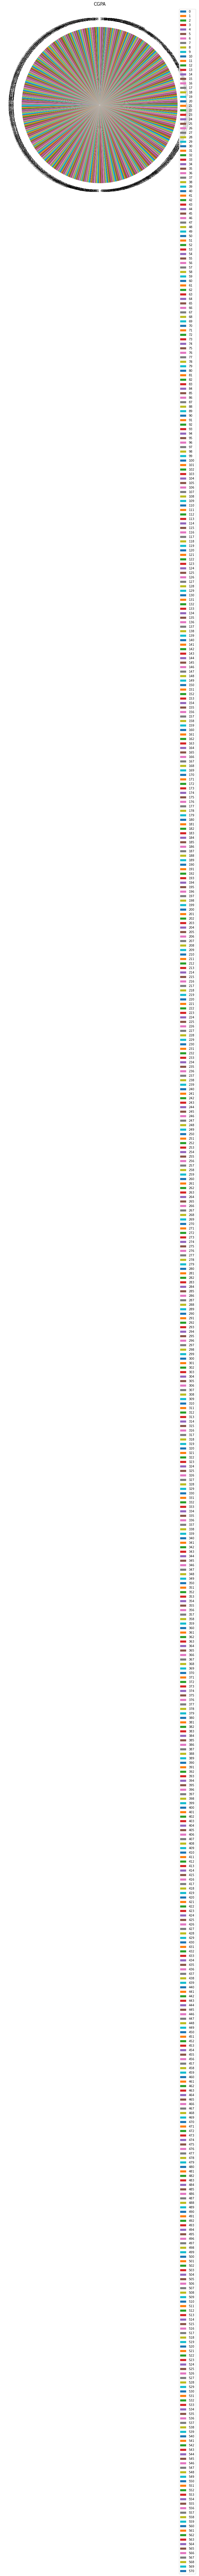

In [38]:
plt.figure(figsize=[15,12])
plt.pie(df_i['CGPA'].values, labels = df_i['CGPA'].index )
plt.title("CGPA", fontsize=15)
plt.legend()
plt.show()